In [87]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
CaseNames_Base = ["IEEE118_mod1"]
CaseNames_ByStages = [CaseName_Base + '_ByStages_nc' for CaseName_Base in CaseNames_Base]


Folder_L = 'L.Cont_Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost\\Results\\L.Cont_Investments_per_hour'

DirName  = os.getcwd()
category_dict = {                 Folder_L: "CHI",
                 Folder_JL: "CHI_fy"
                }

In [89]:
def LoadingData(dir, folder,result, case, ncluster, cm,PCA):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join(dir, folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        if PCA: 
            df = pd.read_csv(os.path.join(dir, folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])
        else:
            df = pd.read_csv(os.path.join(dir, folder, case+'_ByStages_nc'+str(ncluster), '5.OutWoPCA', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])

    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Case'] = case
    df['Clustering method'] = cm
    df["PCA"] = PCA
#     df['Category2'] = cat2
#     df['Category3'] = cat3
    df['Number of clusters'] = ncluster
    df = df.reset_index()
#df = df.reset_index().set_index(['CaseName', 'Category1', 'Category2', 'Category3', 'Category4'])
    # df = df.set_index('CaseName', append=True)
    return df

In [99]:
result = "CostSummary"
nbs_clusters = [(i+1)*10 for i in range(15)] #+ [150, 200, 250, 300, 350, 400]
nbs_clusters = [(i+1)*10 for i in range(20)] #+ [150, 200, 250, 300, 350, 400]

folders = [Folder_L,Folder_JL]
PCAs = [True,False]
results = ["CostSummary"]

results_dfs = dict()
for result in results :
    results_dfs[result] = dict()
    for folder in folders: 
        results_dfs[result][folder] = dict()
        for PCA in PCAs:
            results_dfs[result][folder][PCA] = dict()

            for nb_clusters in nbs_clusters:
                try: 
                    results_dfs[result][folder][PCA][nb_clusters] = LoadingData(DirName, folder,result, CaseName_Base, nb_clusters, category_dict[folder],PCA)
                except FileNotFoundError as e : 
                    print(e)
                    print(folder,nb_clusters, "Does not contain", result)
                    print(nb_clusters,PCA)

In [100]:
# Concatenate results dataframes 
results_dfs_concat = dict()
for result in results:
    results_dfs_concat[result] = pd.concat([results_dfs[result][folder][PCA][nb_clusters] for folder in folders for PCA in PCAs for nb_clusters in results_dfs[result][folder][PCA]])

In [114]:
#Pivot the system cost dataframe and rename some columns
results_dfs_pivot = results_dfs_concat["CostSummary"].pivot_table(values = "MEUR",columns = "Cost/Payment",index = ["Clustering method", "Number of clusters","PCA"]).reset_index().set_index(["Clustering method", "Number of clusters","PCA"])
results_dfs_pivot.rename({"Total          System Cost" : "TSC",'Network    Investment Cost' : "NIC" },axis = 1,inplace=True)

In [115]:
results_dfs_pivot

Cost/Payment                                Consumption Operation Cost   
Clustering method Number of clusters PCA                                 
CHI               10                 False                         0.0  \
                                     True                          0.0   
                  20                 False                         0.0   
                                     True                          0.0   
                  30                 False                         0.0   
...                                                                ...   
CHI_fy            180                True                          0.0   
                  190                False                         0.0   
                                     True                          0.0   
                  200                False                         0.0   
                                     True                          0.0   

Cost/Payment                                Emission              Cost   
Clustering method Number of clusters PCA                                 
CHI               10                 False                  330.324009  \
                                     True                   386.064812   
                  20                 False                  387.513119   
                                     True                   326.199493   
                  30                 False                  377.646086   
...                                                                ...   
CHI_fy            180                True                   437.561047   
                  190                False                  441.663727   
                                     True                   437.561047   
                  200                False                  441.663727   
                                     True                   437.561047   

Cost/Payment                                Generation  Operation Cost   
Clustering method Number of clusters PCA                                 
CHI               10                 False                  484.025388  \
                                     True                   571.507863   
                  20                 False                  577.058617   
                                     True                   483.193811   
                  30                 False                  561.870090   
...                                                                ...   
CHI_fy            180                True                   654.240725   
                  190                False                  659.446104   
                                     True                   654.240725   
                  200                False                  659.446104   
                                     True                   654.240725   

Cost/Payment                                Generation Investment Cost   
Clustering method Number of clusters PCA                                 
CHI               10                 False                         0.0  \
                                     True                          0.0   
                  20                 False                         0.0   
                                     True                          0.0   
                  30                 False                         0.0   
...                                                                ...   
CHI_fy            180                True                          0.0   
                  190                False                         0.0   
                                     True                          0.0   
                  200                False                         0.0   
                                     True                          0.0   

Cost/Payment                                       NIC   
Clustering method Number of clusters PCA                 
CHI               10            

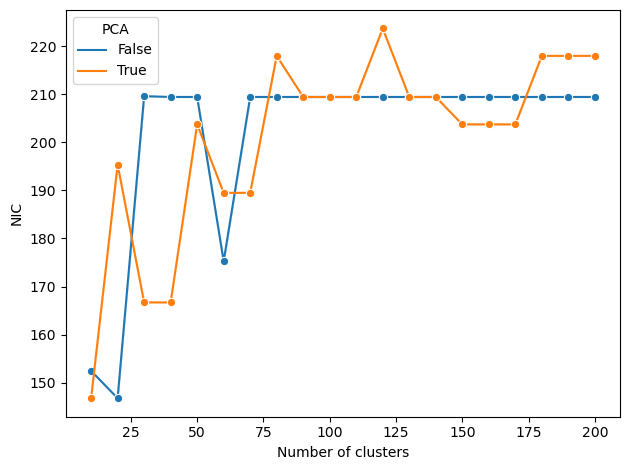

In [121]:
# Define variables
y = "NIC"
#y = "TSC"

x = "Number of clusters"
#rf = results_dfs_pivot.loc[["R&D","OPT_LB","NN_LB1","NN_LB2","OPC","Hourly_inv"]]
#rf = results_dfs_pivot.loc[["FYMILP","R&D","OPT_LB","OPC","Hourly_inv","Cont_Hourly_inv"]]
#rf = results_dfs_pivot.loc[["FYMILP","R&D","OPT_LB","Cont_Hourly_inv","OPC","RF-mix"]]
#rf = results_dfs_pivot.loc[["R&D","OPT_LB","Cont_Hourly_inv","OPC","RF-mix"]]
rf = results_dfs_pivot
#rf = results_dfs_pivot.loc[["R&D_fy","OPT_LB_fy","CHI_fy","OPC_fy","HI_fy","RF-mix"]]
#rf = results_dfs_pivot.loc[["HI_fy"]]
rf = results_dfs_pivot.loc[["CHI_fy","CHI"]]
sns.lineplot(data = rf,x = x, y = y,hue = "PCA",marker = "o")

# Adjust layout
plt.tight_layout()

# Optionally save the figure
#plt.savefig(f"Z.Figures/lineplot_subplots_fy_{y}.png")

# Display the plot
plt.show()